В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням kNearestNeighboors, знайдемо оптимальні гіперпараметри для цього методу і зробимо базові ансамблі. Це дасть змогу порівняти перформанс моделі з попередніми вивченими методами.

0. Зчитайте дані `train.csv` та зробіть препроцесинг використовуючи написаний Вами скрипт `process_bank_churn.py` так, аби в результаті отримати дані в розбитті X_train, train_targets, X_val, val_targets для експериментів.

  Якщо Вам не вдалось реалізувати в завданні `2.3. Дерева прийняття рішень` скрипт `process_bank_churn.py` - можна скористатись готовим скриптом з запропонованого рішення того завдання.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/module_2_3')
import process_bank_churn
from process_bank_churn import preprocess_data

In [3]:
import pandas as pd
raw_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02_02/bank-customer-churn-prediction-dlu-course-c-3/train.csv")
processed = preprocess_data(raw_df)
X_train = processed['X_train']
train_targets = processed['train_targets']
X_val = processed['X_val']
val_targets = processed['val_targets']
input_cols = processed['input_cols']
scaler = processed['scaler']
encoder = processed['encoder']

1. Навчіть на цих даних класифікатор kNN з параметрами за замовченням і виміряйте точність з допомогою AUROC на тренувальному та валідаційному наборах. Зробіть заключення про отриману модель: вона хороша/погана, чи є high bias/high variance?

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, train_targets)

KNeighborsClassifier()

AUROC for Training: 0.96


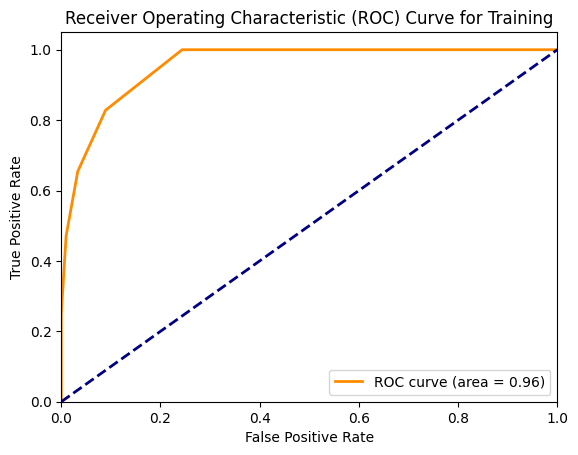

AUROC for Validation: 0.85


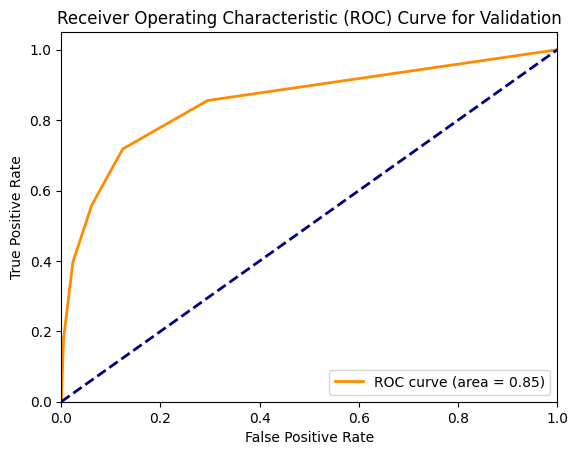

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = knn.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

### Висновок:  
Модель в цілому хороша, тому що показує високий AUROC і на тренувальному, і на валідаційному датасетах. Але AUROC на тренувальному датасеті помітно вищий, ніж AUROC на валідаційному датасеті. Це свідчить про overfitting, тобто high variance

2. Використовуючи `GridSearchCV` знайдіть оптимальне значення параметра `n_neighbors` для класифікатора `kNN`. Поставте крос валідацію на 5 фолдів.

  Після успішного завершення пошуку оптимального гіперпараметра
    - виведіть найкраще значення параметра
    - збережіть в окрему змінну `knn_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `knn_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи стала вона краще порівняно з попереднім пукнтом (2) цього завдання? Чи є вона краще за дерево прийняття рішень з попереднього ДЗ?

In [6]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors': np.arange(1, 100)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, train_targets)
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_, knn_gs.best_score_)

{'n_neighbors': np.int64(7)} 0.8673333333333334


AUROC for Training: 0.95


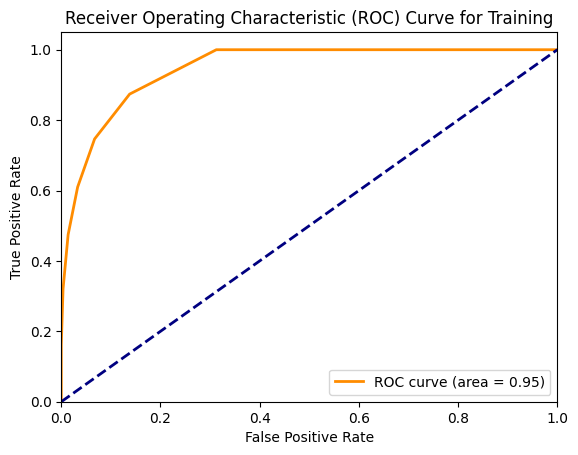

AUROC for Validation: 0.87


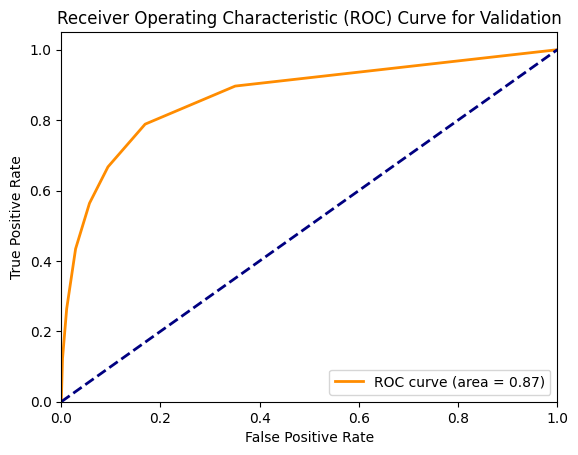

In [7]:
def compute_auroc_and_build_roc_best(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = knn_best.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc_best(X_train, train_targets, 'Training')
compute_auroc_and_build_roc_best(X_val, val_targets, 'Validation')

### Висновок:  
Якість моделі трішки підвищилася: AUROC для валідаційного набору зріс із 0.85 до 0.87. При цьому дещо скоротилася різниця між AUROC тренувального і валідаційного датасету. Але в цілому якість моделі покращилася несуттєво.  
Також модель показує гірший AUROC, ніж дерево прийняття рішень з минулого ДЗ (AUROC - 0.87 i 0.92, відповідно)

3. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `GridSearchCV` за сіткою параметрів
  - `max_depth` від 1 до 20 з кроком 2
  - `max_leaf_nodes` від 2 до 10 з кроком 1

  Обовʼязково при цьому ініціюйте модель з фіксацією `random_state`.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_best` найкращу модель, знайдену з `GridSearchCV`
    - оцініть якість передбачень  `dt_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли вручну?

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import time
tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': list(range(1, 21, 2)),
    'max_leaf_nodes': list(range(2, 11))
}
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc'
)
start_time = time.time()
grid_search.fit(X_train, train_targets)
end_time = time.time()
execution_time = end_time - start_time
print(f"Витрачений час: {round(execution_time,1)} секунд")
print("Найкращі параметри:", grid_search.best_params_)
dt_best = grid_search.best_estimator_
y_train_pred_proba = dt_best.predict_proba(X_train)[:, 1]
y_val_pred_proba = dt_best.predict_proba(X_val)[:, 1]
auroc_train = roc_auc_score(train_targets, y_train_pred_proba)
auroc_val = roc_auc_score(val_targets, y_val_pred_proba)
print(f"AUROC на тренувальній вибірці: {auroc_train}")
print(f"AUROC на валідаційній вибірці: {auroc_val}")

Витрачений час: 5.1 секунд
Найкращі параметри: {'max_depth': 5, 'max_leaf_nodes': 10}
AUROC на тренувальній вибірці: 0.9014754782174744
AUROC на валідаційній вибірці: 0.9002184649152891


Ця модель краща, ніж попередні - AUROC на валідаційному датасеті складає 0.90. Крім цього, AUROC на тренувальному і валідаційному датасетах однаковий, тобто немає ні overfitting, ні underfitting

4. Виконайте пошук оптимальних гіперпараметрів для `DecisionTreeClassifier` з `RandomizedSearchCV` за заданою сіткою параметрів і кількість ітерацій 40.

  Поставте кросвалідацію на 3 фолди, `scoring='roc_auc'`, зафіксуйте `random_seed` процедури крос валідації та виміряйте, скільки часу потребує пошук оптимальних гіперпараметрів.

  Після успішного завершення пошуку оптимальних гіперпараметрів
    - виведіть найкращі значення параметра
    - збережіть в окрему змінну `dt_random_search_best` найкращу модель, знайдену з `RandomizedSearchCV`
    - оцініть якість передбачень  `dt_random_search_best` на тренувальній і валідаційній вибірці з допомогою AUROC.
    - зробіть висновок про якість моделі. Чи ця модель краща за ту, що ви знайшли з `GridSearch`?
    - проаналізуйте параметри `dt_random_search_best` і порівняйте з параметрами `dt_best` - яку бачите відмінність? Ця вправа потрібна аби зрозуміти, як різні налаштування `DecisionTreeClassifier` впливають на якість моделі.

In [18]:
params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}

In [19]:
from sklearn.model_selection import RandomizedSearchCV, KFold
dt = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=3, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=params_dt,
    n_iter=40,
    scoring='roc_auc',
    cv=cv,
    random_state=42
)
start_time = time.time()
random_search.fit(X_train, train_targets)
end_time = time.time()
execution_time = end_time - start_time
print(f"Витрачений час: {round(execution_time,1)} секунд")
print(f"Найкращі параметри: {random_search.best_params_}")
dt_random_search_best = random_search.best_estimator_
y_train_proba = dt_random_search_best.predict_proba(X_train)[:, 1]
y_val_proba = dt_random_search_best.predict_proba(X_val)[:, 1]
auroc_train = roc_auc_score(train_targets, y_train_proba)
auroc_val = roc_auc_score(val_targets, y_val_proba)
print(f"AUROC на тренуванні: {auroc_train}")
print(f"AUROC на валідації: {auroc_val}")

Витрачений час: 1.5 секунд
Найкращі параметри: {'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': np.int64(14), 'max_features': None, 'max_depth': np.int64(16), 'criterion': 'entropy'}
AUROC на тренуванні: 0.9169275635848141
AUROC на валідації: 0.9166204815145071


Модель краща, ніж та, що знайдена за допомогою GridSearch - AUROC на тренувальному і валідаційному датасетах складає 0.92.  
Модель dt_random_search_best має вищий параметр max_depth порівняно із моделлю dt_best (16 і 5, відповідно), а також вищий max_leaf_nodes (14 і 10, відповідно)

5. Якщо у Вас вийшла метрика `AUROC` в цій серії експериментів - зробіть ще один `submission` на Kaggle і додайте код для цього і скріншот скора на публічному лідерборді нижче.

  Сподіваюсь на цьому етапі ви вже відчули себе справжнім дослідником 😉

AUROC вийшов такий самий, як у ДЗ 2.3, тому повторний submission не робив